In [3]:
from PIL import Image

In [4]:
import cv2
import numpy as np

In [5]:
import os

In [4]:
def image_2c_gen():
    #path=r"C:/Users/Hp/MyProjects/AutoWriter/Data/a-z_letters/"
    path=r"E:/Projects/Projects_jupy/AutoWriter/Part-1/Data/a-z_letters/"
    #oppath="C:/Users/Hp/MyProjects/AutoWriter/Data/a-z_letters_2C/"
    oppath=r"E:/Projects/Projects_jupy/AutoWriter/Part-1/Data/a-z_letters_2C/"
    canvas_pix_int=255
    thresh=130
    dir_list = os.listdir(path)
    for im_name in dir_list:
        im1=cv2.imread(path+im_name)
        im1=cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
        for i in range(len(im1)):
            for j in range(len(im1[i])):
                if(im1[i][j]>thresh):
                    im1[i][j]=canvas_pix_int
                else:
                    im1[i][j]=10
        cv2.imwrite(oppath+im_name,im1)
        
def just_letter_gen():
    #path=r"C:/Users/Hp/MyProjects/AutoWriter/Data/a-z_letters_2C/"
    path=r"E:/Projects/Projects_jupy/AutoWriter/Part-1/Data/a-z_letters_2C/"
    #oppath=r"C:/Users/Hp/MyProjects/AutoWriter/Data/a-z_letters_2C_snip/"
    oppath=r"E:/Projects/Projects_jupy/AutoWriter/Part-1/Data/a-z_letters_2C_snip/"
    dir_list = os.listdir(path)
    b_in=10

    for im_name in dir_list:
        note_i_u=-1
        note_i_d=-1
        note_j_l=-1
        note_j_r=-1
        im1=cv2.imread(path+im_name)
        im1=cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
    #    print(im1.shape)
        (shape_y,shape_x)=im1.shape
        for i in range(shape_y):
            for j in range(len(im1[i])):
                if(im1[i][j]==10):
                    note_i_u=i
                    break
            if(note_i_u!=-1):
                break
        for i in range(shape_y-1,0,-1):
            for j in range(len(im1[i])):
                if(im1[i][j]==10):
                    note_i_d=i
                    break
            if(note_i_d!=-1):
                break

        im1_t=im1.T
        for i in range(shape_x):
            for j in range(len(im1_t[i])):
                if(im1_t[i][j]==10):
                    note_j_l=i
                    break
            if(note_j_l!=-1):
                break
        for i in range(shape_x-1,0,-1):
            for j in range(len(im1_t[i])):
                if(im1_t[i][j]==10):
                    note_j_r=i
                    break
            if(note_j_r!=-1):
                break
        try:
            if(note_i_u>=2):
                n_m=im1[note_i_u-2:note_i_d+2]
            else:
                n_m=im1[note_i_u:note_i_d]
        except:
            n_m=im1[note_i_u:note_i_d]
        print(n_m.shape)
        n_m_t=n_m.T
        try:
            if(note_j_l>=2):
                n_m_t=n_m_t[note_j_l-2:note_j_r+2]
            else:
                n_m_t=n_m_t[note_j_l:note_j_r+2]
        except:
            n_m_t=n_m_t[note_j_l:note_j_r]

        opim=n_m_t.T

        cv2.imwrite(oppath+im_name,opim)


    

In [5]:
#image_2c_gen()

In [6]:
#just_letter_gen()

(34, 77)
(47, 87)
(33, 65)
(55, 93)
(38, 62)
(58, 66)
(75, 76)
(50, 85)
(53, 45)
(82, 63)
(47, 66)
(50, 68)
(38, 97)
(30, 75)
(35, 52)
(60, 62)
(56, 67)
(44, 82)
(42, 57)
(54, 58)
(41, 67)
(40, 53)
(44, 101)
(41, 60)
(74, 70)
(54, 92)


In [50]:
#without "PLUS" features

ip_chr=input('ENTER THE TEXT : ')
max_height=82
j=0
img1 = Image.open(r"C:/Users/Hp/MyProjects/AutoWriter/Data/canvas.jpg")
for i in ip_chr:
    img2_path=r"C:/Users/Hp/MyProjects/AutoWriter/Data/a-z_letters_2C_snip/"+i+'.png'
    img2 = Image.open(img2_path)
    im_r=cv2.imread(img2_path)
    #im
    if(im_r.shape[0]<max_height):
        diff=abs(im_r.shape[0]-max_height)
        l=[]
        for i in range(diff):
            l.append(im_r[0])
        
        im_r=np.vstack((l,im_r))
  
    y_sliding=im_r.shape[1]
    #img1.paste(img2, (j,0), mask = img2)
    img2=Image.fromarray(im_r)
    img1.paste(img2, (j,0))
    j=j+y_sliding
    img2=img1
img2.show()



ENTER THE TEXT : fff


In [13]:
#With "PLUS" features
ip_chr=input('ENTER THE TEXT : ')
max_height=82
j=0
x_sl=0
#img1 = Image.open(r"C:/Users/Hp/MyProjects/AutoWriter/Data/canvas.jpg")
img1=Image.open(r"E:/Projects/Projects_jupy/AutoWriter/Part-1/Data/canvas.jpg")
#img1_cv=cv2.imread(r"C:/Users/Hp/MyProjects/AutoWriter/Data/canvas.jpg")
img1_cv=cv2.imread(r"E:/Projects/Projects_jupy/AutoWriter/Part-1/Data/canvas.jpg")
for i in ip_chr:
    if(i==' '):
        j=j+35
    else:
        #img2_path=r"C:/Users/Hp/MyProjects/AutoWriter/Data/a-z_letters_2C_snip/"+i+'.JPG'
        img2_path=r"E:/Projects/Projects_jupy/AutoWriter/Part-1/Data/a-z_letters_2C_snip/"+i+'.png'
        img2 = Image.open(img2_path)
        im_r=cv2.imread(img2_path)
        if(im_r.shape[0]<max_height):
            diff=abs(im_r.shape[0]-max_height)
            x_sl=x_sl+diff
        if(j>=img1_cv.shape[1]):
            j=0
            x_sl=x_sl+max_height+4
        y_sliding=im_r.shape[1]
        #img1.paste(img2, (j,0), mask = img2)
        img2=Image.fromarray(im_r)
        img1.paste(img2, (j,x_sl))
        x_sl=x_sl-diff
        j=j+y_sliding
        img2=img1
img2.show()

ENTER THE TEXT : githun ueakfuyvavfolqfOYE hfaeuhbgfh egcrueebfguursbfh survtuyrrbgfeuy uey eru ueyv eryg


# bin

In [2]:
try:
    x=8/0
    print(x)
except:
    print("some error/exception")

some error/exception


In [58]:
w_add.shape

(1, 20, 3)

In [60]:
len(l[0][0])

3

In [35]:
len(l[0][0])

3

In [42]:
len(l[0][0])

3

In [52]:
im_r.shape

(82, 35, 3)

In [56]:
np.array([w_row]).shape

(1, 20, 3)

# work


In [ ]:
#With "PLUS" features (OLD)--> storing this for that np.vstack reference, incase if it is useful in furtur
'''
ip_chr=input('ENTER THE TEXT : ')
max_height=82
j=0
x_sl=0
#img1 = Image.open(r"C:/Users/Hp/MyProjects/AutoWriter/Data/canvas.jpg")
img1=Image.open(r")
img1_cv=cv2.imread(r"C:/Users/Hp/MyProjects/AutoWriter/Data/canvas.jpg")
for i in ip_chr:
    if(i==' '):
        #Block of code
        l=[]
        w_row=img1_cv[0][:35]
        for i in range(max_height):
            l.append(w_row)
        w_add=np.array([w_row])
        im_r=np.vstack((l,w_add))
    else:
        img2_path=r"C:/Users/Hp/MyProjects/AutoWriter/Data/a-z_letters_2C_snip/"+i+'.JPG'
        img2 = Image.open(img2_path)
        im_r=cv2.imread(img2_path)
        if(im_r.shape[0]<max_height):
            diff=abs(im_r.shape[0]-max_height)
            l=[]
            for i in range(diff):
                l.append(img1_cv[0][:im_r.shape[1]])

            im_r=np.vstack((l,im_r))
  
    if(j>=img1_cv.shape[1]):
        j=0
        x_sl=x_sl+max_height+4
    y_sliding=im_r.shape[1]
    #img1.paste(img2, (j,0), mask = img2)
    img2=Image.fromarray(im_r)
    img1.paste(img2, (j,x_sl))
    j=j+y_sliding
    img2=img1
img2.show()
'''

In [14]:
path=r"C:/Users/Hp/MyProjects/AutoWriter/Data/a-z_letters_2C_snip/"
max_v=0
dir_list = os.listdir(path)
for im_name in dir_list:
    im1=cv2.imread(path+im_name)
    if(im1.shape[0]>max_v):
        max_v=im1.shape[0]
    

In [15]:
max_v

82

# bin

In [21]:
im_r.shape

(82, 51, 3)

AttributeError: 'list' object has no attribute 'shape'

In [23]:
img1_cv[:20].shape

(20, 1280, 3)

In [16]:
l

[array([[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]], dtype=uint8), array([[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]], dtype=uint8), array([[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255

In [14]:
np.vstack((l,img1_cv[:20]))

C:\Users\Hp\Anaconda3\lib\site-packages\numpy\core\shape_base.py:121: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 3 dimension(s)

In [6]:
np.array([255]*200)

array([255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 25

In [101]:
im1[0:6].shape

(6, 51, 3)

In [112]:
im_r[0].shape

(53, 3)

In [100]:
l=np.array([im1[0],im1[0],im1[0]])
np.vstack((l,im1[0])).shape 
#np.array([l,l]).shape

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 3 dimension(s) and the array at index 1 has 2 dimension(s)

In [53]:
x=np.array([[255,255,255]]*im1.shape[1])

In [54]:
l=[x]
l.append(x)

In [55]:
l

[array([[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],


In [35]:
np.merge(x,x)

AttributeError: module 'numpy' has no attribute 'merge'

In [7]:
path=r"C:/Users/Hp/MyProjects/AutoWriter/Data/a-z_letters_2C/e.png"
im1=cv2.imread(path)
im1=cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
im1_t=im1.T
cv2.imshow('hi',im1_t)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
im1[0][:10]

array([255, 255, 255, 255, 255, 255, 255, 255, 255, 255], dtype=uint8)

(34, 77)
(47, 87)
(33, 65)
(55, 93)
(38, 62)
(58, 66)
(75, 76)
(50, 85)
(53, 45)
(82, 63)
(47, 66)
(50, 68)
(38, 97)
(30, 75)
(35, 52)
(60, 62)
(56, 67)
(44, 82)
(42, 57)
(54, 58)
(41, 67)
(40, 53)
(44, 101)
(41, 60)
(74, 70)
(54, 92)


ENTER THE TEXT : hello


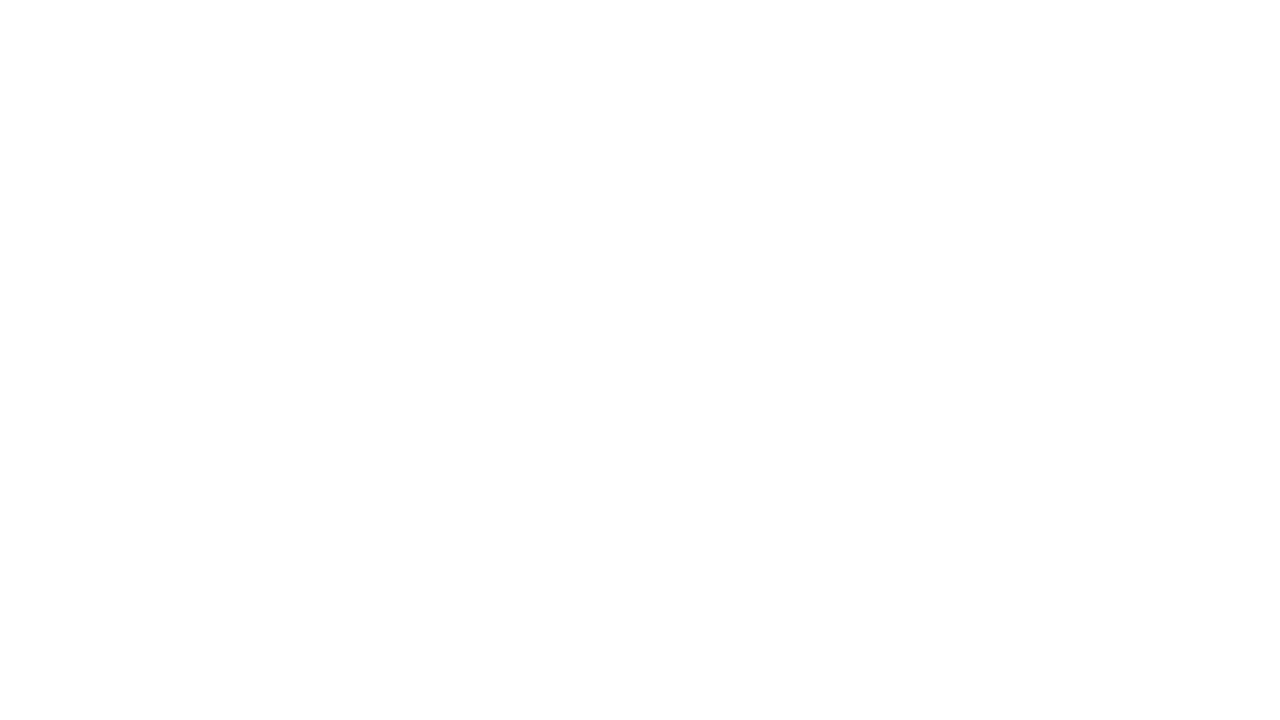

In [5]:
img1